<a href="https://colab.research.google.com/github/tcurtis714/lis4693/blob/main/lab-1/Lab_1_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment 1: Acquiring Text Data using API

## Introduction

In this lab assignment, we will use Youtube Video Transcript API to scrape video transcript from Youtube. Video transcript provides details such as snippets, start time, end time, chapters and language details.

You can read more about ther YouTube Transcript API and different search parameter here: https://serpapi.com/youtube-video-transcript


## Learning Objectives

* Scrape YouTube video transcripts using the YouTube Video Transcript API.
* Parse transcript components such as start time.
* Prepare transcript data for downstream tasks.



## Install and call packages

In [1]:
!pip install requests

In [2]:
import requests
import os
import json

## Step 1: Get the API Key

 * Make an Account on SerpAPI (https://serpapi.com/) using your Google gmail or GitHub.

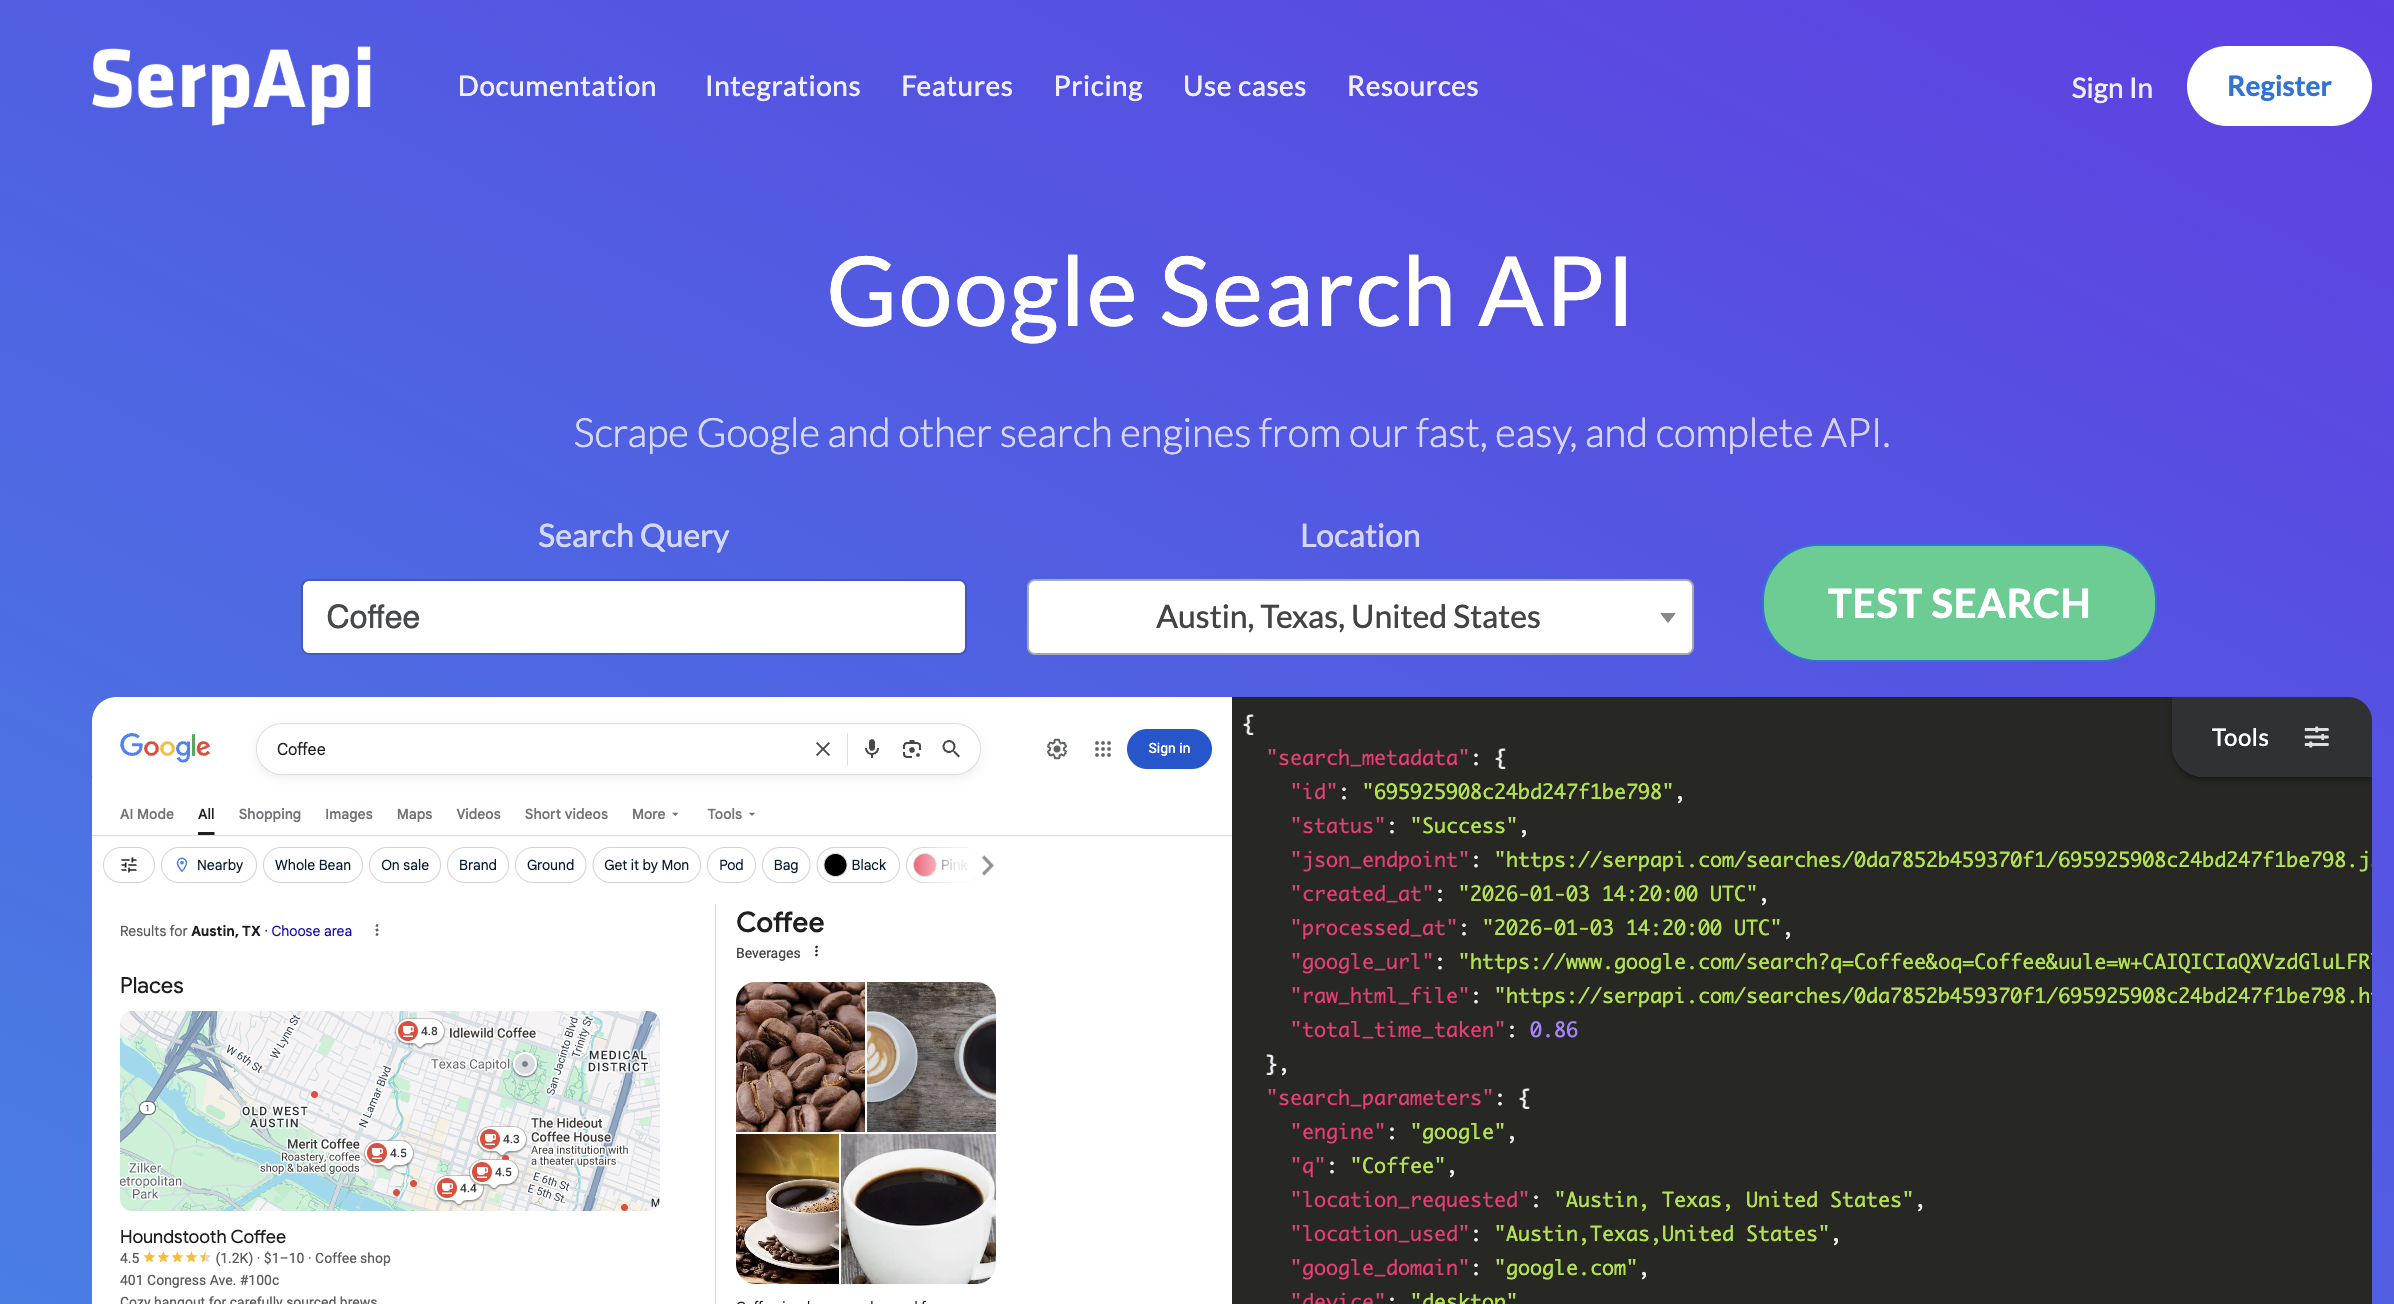

* Copy your Private API Key and Paste it in the next code cell below.

*NEVER share your Private API KEY with anyone. Also, never put it on GitHub! After you complete your analysis remove your API KEY from the notebook and save the file on GitHub*

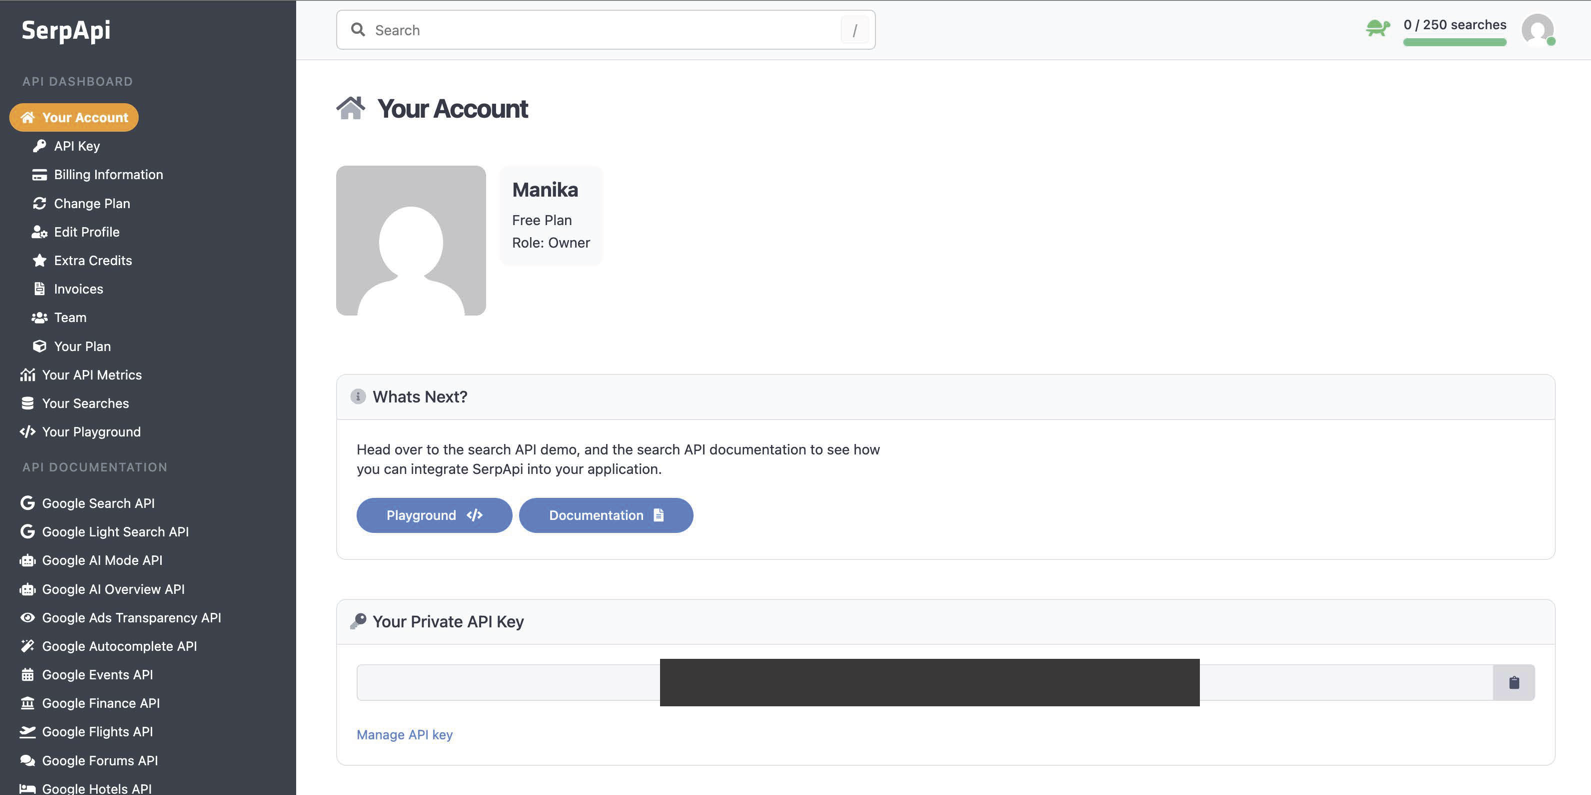

In [3]:
SERPAPI_API_KEY = "ENTER_API_KEY"

## Step 2

* Now, we will prepare the parameter variable and call it 'params' here.

* As we are using 'youtube video transcript' for this assignment, we will use
it for our `engine` value.

* Next we for `v` which is the YouTube video id, we can get it directly from the YouTube. For instance, for this YouTube video link (https://www.youtube.com/watch?v=U6KgqeJkhU0), the video id is the last part of the link `v=U6KgqeJkhU0`

* Lastly, we add `type` to get the transcript type. `asr` is for auto-generated transcript

In [5]:
params = {
    "api_key": SERPAPI_API_KEY,
    "engine": "youtube_video_transcript",
    "v": "Djcn4l3xwM8",
    "type": "asr"
}

## Step 3

We will now perform the `request.get` itself and then catch the response by `search.json`

In [8]:
search = requests.get("https://serpapi.com/search", params=params)
response = search.json()

print(json.dumps(response, indent=2))

{
  "search_metadata": {
    "id": "698d5f293a92066a9291ffc3",
    "status": "Success",
    "json_endpoint": "https://serpapi.com/searches/rAsHavYKXPKlwu9nOKds7w/698d5f293a92066a9291ffc3.json",
    "created_at": "2026-02-12 05:03:37 UTC",
    "processed_at": "2026-02-12 05:03:37 UTC",
    "youtube_video_transcript_url": "https://www.youtube.com/watch?v=Djcn4l3xwM8",
    "raw_html_file": "https://serpapi.com/searches/rAsHavYKXPKlwu9nOKds7w/698d5f293a92066a9291ffc3.html",
    "prettify_html_file": "https://serpapi.com/searches/rAsHavYKXPKlwu9nOKds7w/698d5f293a92066a9291ffc3.prettify",
    "total_time_taken": 9.22
  },
  "search_parameters": {
    "engine": "youtube_video_transcript",
    "v": "Djcn4l3xwM8",
    "language_code": "en",
    "type": "asr"
  },
  "transcript": [
    {
      "start_ms": 1120,
      "end_ms": 2480,
      "snippet": "What's going on, YouTube? It's your boy",
      "start_time_text": "0:01"
    },
    {
      "start_ms": 2480,
      "end_ms": 5600,
      "snippet

After you run a file you see an array of each of the text here complete with the snippet start and end time in milliseconds. We also have chapters in the response.

Let's focus on getting the video transcript and loop the information as shown below.

We will only focus on two fields `snippet` and `start_time_text` for the transcript response.

In [9]:
for result in response.get("transcript", []):
    snippet = result.get("snippet")
    start_time_text = result.get("start_time_text")

    print(f"SnippetL: {snippet}")
    print(f"Start Time: {start_time_text}")
    print("-" * 10)

SnippetL: What's going on, YouTube? It's your boy
Start Time: 0:01
----------
SnippetL: King Red Diamonds. It's 2026
Start Time: 0:02
----------
SnippetL: and you know what time it is. It's Neo3,
Start Time: 0:05
----------
SnippetL: baby. So, let's get into it. Um, today
Start Time: 0:09
----------
SnippetL: I'm going to be going over pretty much
Start Time: 0:12
----------
SnippetL: my thoughts on the game, giving you guys
Start Time: 0:13
----------
SnippetL: some, you know, tips and tricks here and
Start Time: 0:15
----------
SnippetL: there and stuff. Pretty much getting
Start Time: 0:17
----------
SnippetL: back to what I usually do with my Neo
Start Time: 0:18
----------
SnippetL: videos. Um, build videos obviously will
Start Time: 0:20
----------
SnippetL: be coming later on once I get a little
Start Time: 0:22
----------
SnippetL: further along in the story. I think
Start Time: 0:24
----------
SnippetL: right now I'm out of the first region.
Start Time: 0:26
----------
Snippet

Now, we see a tidy version of the response with only snippet and start time text as the output here.

## Step 4

I want to clean this text further and remove the label and seperator lines. After that we will save the results as .txt file. For this, we will use the code shown in the next cell.  

Let me enumerate what each part of the code is doing:

*  `with open('transcript.txt', 'w') as f::` opens a new file named 'transcript.txt' in write mode ('w')
*   `for result in response.get("transcript", [])::` loop iterates through each item in the transcript list found within the response data. If transcript is missing, it defaults to an empty list [] to avoid errors.
* `snippet = result.get("snippet")` extracts the text content associated with the snippet from the current result item.
* `if snippet` checks if a valid snippet exists (i.e., it's not empty or None).
* `f.write(f"{snippet}\n")` writes the snippet to the file (if found) followed by a newline character (\n), so each snippet appears on a new line.
* `print("Results saved to transcript.txt")` prints a message to the screen confirming that the process is complete and a new file named `transcript.txt` is saved!

In [10]:
with open('transcript.txt', 'w') as f:
    for result in response.get("transcript", []):
        snippet = result.get("snippet")
        if snippet:
            f.write(f"{snippet}\n")

print("Results saved to transcript.txt")

Results saved to transcript.txt


You can see the file `transcript.txt` on left sidebar in Google Colab under folders (see the screenshot below). Download it to save on your machine.





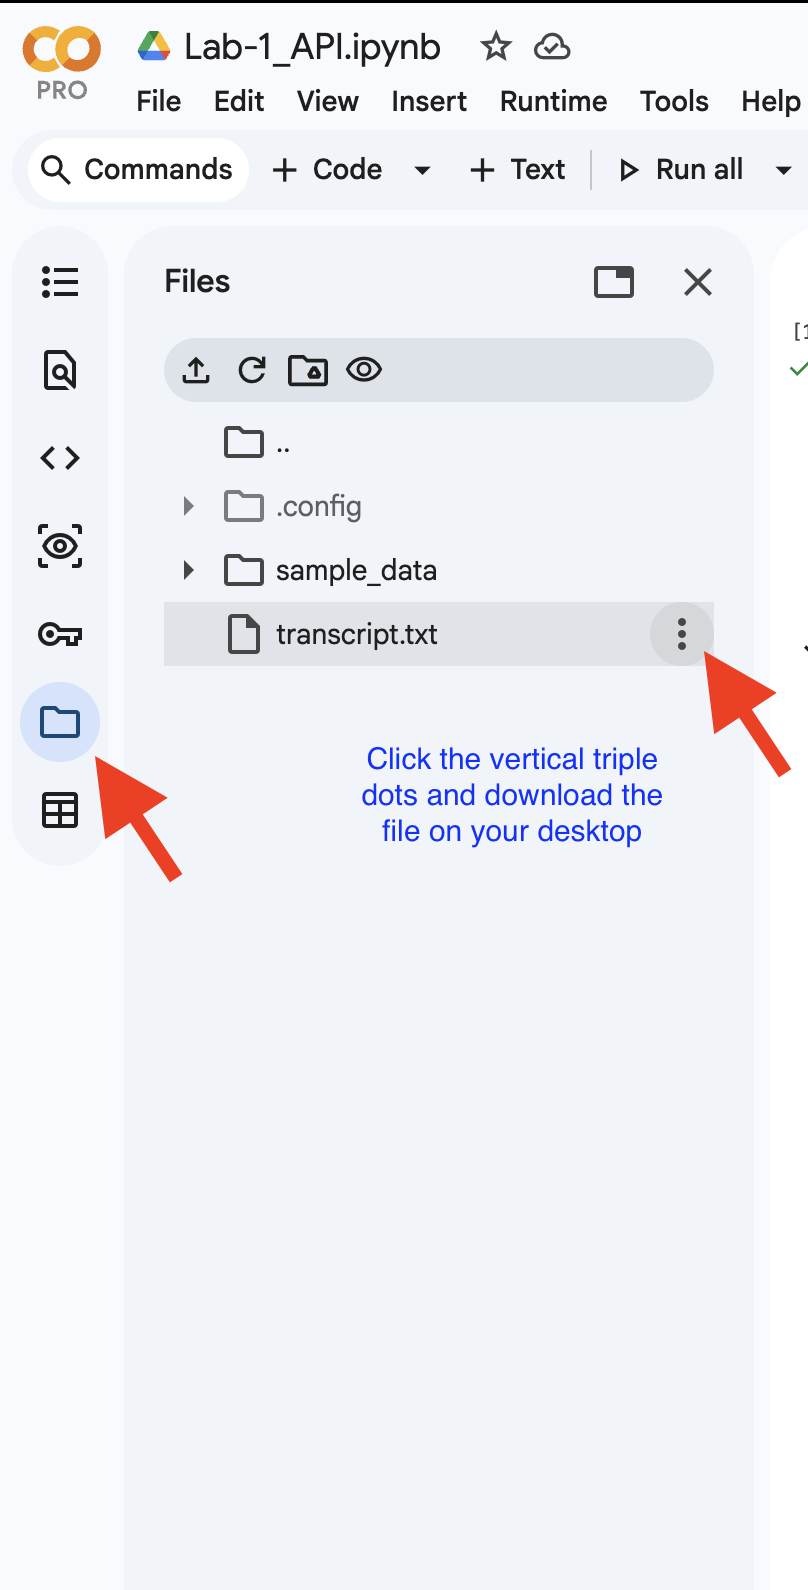


# EXCERCISE!

1. Open the Colab file and make a copy on your end.
2. Choose a YouTube video of your choice and follow the steps in the Google Colab file [3 Points].
3. At the end of your Colab notebook, create a new text cell and write a brief reflection for this assignment in a few sentences addressing the following [2 Points]:
 - What went well?
 - What did not go well or what challenges you encountered?
4. Make a new folder named `lab-1` in your `lis4693`/`lis5693` repo on GitHub. [1 Point]
5. Upload your `transcript.txt` file to your `lab-1` GitHub repo. [1.5 Point]
6. Push your Google Colab file to your `lab-1` GitHub repo. [1.5 Point]
7. Share the link to your `lab-1` GitHub repo for this lab assignment on CANVAS for credit. [1 Point]

# Reflection
I did not have any serious problems with this assignment. The initial API search timed out on my first attempt, but the second was successful. Markdown confused me a little bit at first since I've never worked with it before. I feel I have a good grasp of it now.